<a href="https://colab.research.google.com/github/Deepspacee12/Malaria_prediction/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Normalization, Dense, InputLayer,BatchNormalization
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True , as_supervised= True , shuffle_files= True , split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteL76R96/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpvm8jtntntfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


**Train test split**


In [5]:

def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  dataset_size = len(dataset)
  Train_dataset = dataset.take(int(TRAIN_RATIO*dataset_size))


  Val_test_dataset = dataset.skip(int(TRAIN_RATIO*dataset_size))
  Val_dataset = Val_test_dataset.take(int(VAL_RATIO*dataset_size))


  Test_dataset = Val_test_dataset.skip(int(TEST_RATIO*dataset_size))
  return Train_dataset , Val_dataset , Test_dataset


In [6]:
TRAIN_RATIO= 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
Train_dataset,Val_dataset,Test_dataset = split(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(Train_dataset.take(1).as_numpy_iterator()),list(Val_dataset.take(1).as_numpy_iterator()),list(Test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

**Visulizing data**

TypeError: ignored

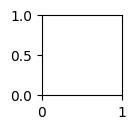

In [35]:
for i, (image,label) in enumerate(Val_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

**Data processing**

firstly we will do the resizing part

then we will normalize it

In [8]:
IM_SIZE=224
def resizing_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/225.0,label

In [9]:
Val_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
train_dataset= Train_dataset.map(resizing_rescale)
Val_dataset = Val_dataset.map(resizing_rescale)
Test_dataset = Test_dataset.map(resizing_rescale)

In [11]:
Val_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [13]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
Val_dataset = Val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
Val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [16]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**model creation**

In [17]:
model = tf.keras.Sequential([
                            InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

                            Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size=2,strides=2),
                            Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size=2,strides=2),

                            Flatten(),

                            Dense(1000,activation="relu"),
                            BatchNormalization(),
                            Dense(100,activation="relu"),
                            BatchNormalization(),
                            Dense(1,activation="sigmoid"),

])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [18]:
y_tru = [0,0,1,1]
y_per=[0.03,0.2,1.2,0.3]
bce=tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_tru,y_per)

<tf.Tensor: shape=(), dtype=float32, numpy=0.58100903>

In [19]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [20]:
history = model.fit(train_dataset , validation_data =Val_dataset,epochs = 100 , verbose = 1)

Epoch 1/100
689/689 [==============================] - 57s 64ms/step - loss: 0.6776 - accuracy: 0.6082 - val_loss: 0.6728 - val_accuracy: 0.6479
Epoch 2/100
689/689 [==============================] - 58s 84ms/step - loss: 0.6097 - accuracy: 0.6826 - val_loss: 0.6712 - val_accuracy: 0.6853
Epoch 3/100
689/689 [==============================] - 48s 69ms/step - loss: 0.3700 - accuracy: 0.8609 - val_loss: 3.0327 - val_accuracy: 0.4944
Epoch 4/100
689/689 [==============================] - 53s 77ms/step - loss: 0.4463 - accuracy: 0.8102 - val_loss: 1.0478 - val_accuracy: 0.5528
Epoch 5/100
689/689 [==============================] - 49s 71ms/step - loss: 0.6548 - accuracy: 0.6395 - val_loss: 1.0846 - val_accuracy: 0.5445
Epoch 6/100
689/689 [==============================] - 52s 75ms/step - loss: 0.6042 - accuracy: 0.6894 - val_loss: 7.6314 - val_accuracy: 0.6240
Epoch 7/100
689/689 [==============================] - 44s 64ms/step - loss: 0.5672 - accuracy: 0.7203 - val_loss: 79.6014 - val_a

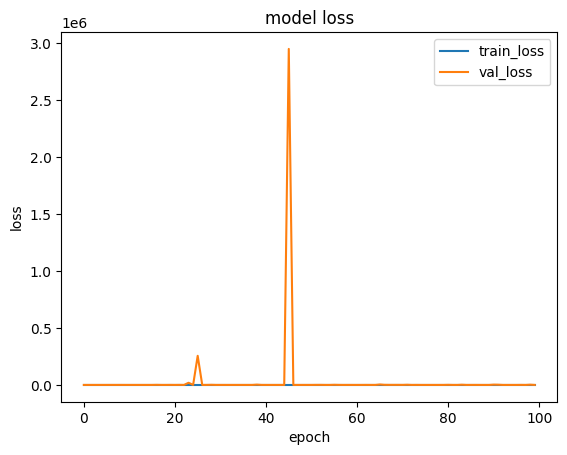

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

# Model Evaluation

In [28]:
Test_dataset = Test_dataset.batch(1)

In [29]:
Test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [30]:
model.evaluate(Test_dataset)

2757/2757 [==============================] - 21s 4ms/step - loss: 1.2545 - accuracy: 0.9329


[1.254513144493103, 0.9328981041908264]

In [34]:
parasite_or_not(model.predict(Test_dataset.take(1))[0][0])

1/1 [==============================] - 10s 10s/step


'U'

In [33]:
def parasite_or_not(x):
  if(x<0.5):
    return str('p')
  else:
    return str('U')

# Visualizing prediction

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


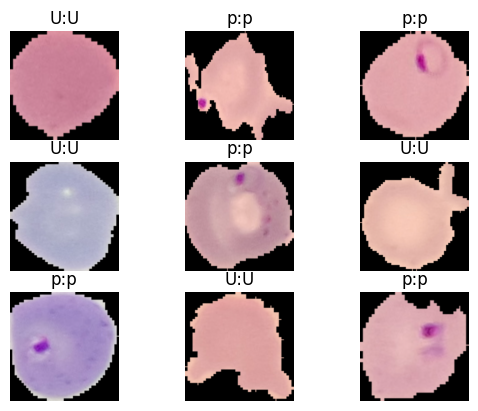

In [38]:
for i, (image,label) in enumerate(Test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(model.predict(image)[0][0])))

  plt.axis('off')